# Домашнее задание 5

Это домашнее задание по материалам 8-12 неделей семестра (8-12 лекции). Дедлайн по отправке - 23:59 26 мая.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МГУ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МГУ_5__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Суммарный балл за задание равен 170. Чтобы получить максимальный оценку за задание, нужно набрать 100 баллов. Баллы сверх 100 позволяют набрать оценку выше максимума.

- Часть задач помечена $\triangle$. Они также входят в максимальный балл за задание, но мы считаем, что достаточно выполнить задания без $\triangle$, чтобы вникнуть в основные вещи, происходящие в соотвествующей части задания.

Желаем успехов!

### Часть 1. Стохастическая оптимизация

__Задача 1. (всего 60 баллов)__ Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w\|^2_2,
\end{equation}
где $\ell: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ - функция потерь, $g : \mathbb{R}^d \times \mathbb{R}^x \to \mathbb{R}$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i \in \mathbb{R}^x$ и меток $y_i \in \mathbb{R}$.

Используем линейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Как уже знаем, полученная задача называется задачей логистической регрессии.

Данную задачу можно переписать следующим образом:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{s} \sum\limits_{j=1}^s f_j(w) := \frac{1}{s} \sum\limits_{j=1}^s \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_{(j-1)b + i}), y_{(j-1)b + i}) + \frac{\lambda}{2} \| w\|^2_2\right],
\end{equation}
где $b$ - размер батча, $s$ - количество батчей, а $b s = n$ - полный размер выборки.

Градиент функции $f_j$:
$$
\nabla f_j(w) = \frac{1}{b} \sum_{i=1}^b \frac{-y_{(j-1)b + i} x_{(j-1)b + i}}{1 + \exp(y_{(j-1)b + i} w^Tx_{(j-1)b + i})}.
$$
Константу Липшица градиента $\nabla f_j$ можно оценить, как $L_j = \frac{1}{4b} \sum\limits_{i=1}^b \| x_{(j-1)b + i} \|^2_2$.

Метод стохастического градиентного спуска (SGD) для данной задачи записывается следующим образом:
$$
w^{k+1} = w^k - \gamma_k \nabla f_{j_k} (w^k),
$$
где номер $j_k$ генерируется независимо и равномерно из $\{1, \ldots, s \}$.

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$, в которой и будет храниться выборка $\{x_i, y_i\}_{i=1}^n$:

In [1]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [2]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Поменяем вектор $y$, чтобы $y_i$ принимали значения $-1$ и $1$. Вы также можете сделать дополнительную предобработку данных (приёмами из машинного обучения), но это никак дополнительно не оценивается.

In [3]:
y = 2 * y - 3

Разделим данные на две части: обучающую и тестовую.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Реализуйте в коде подсчет значения и градиента ($X$, $y$ лучше подавать в качестве параметра, чтобы была возможность их менять). Можно использовать как библиотеку ``numpy``, так и библиотеки ``autograd``, ``pytorch``, ``jax``.

In [ ]:
#ваше решение (Code и Markdown)

In [17]:
import numpy as np
import autograd
import autograd.numpy as anp
import time

from sklearn.metrics import accuracy_score

In [131]:
class LogisticRegression():
    def __init__(self, lamda, init_zeros=False):
        np.random.seed(10)
        self.lamda = lamda
        if init_zeros:
            self.weigth = np.zeros(X_train.shape[1])
        else:
            self.weigth = np.random.normal(size=X_train.shape[1])
    
    def loss(self, weigth, X_train, y_train):
        margin = (X_train*weigth).sum(axis=1)
        log = anp.log(1 + anp.exp(-1*y_train*margin) + 1e-8)
        return anp.sum(log) / X_train.shape[0] + self.lamda*anp.sum(weigth**2) / 2
    
    def get_grad(self, X_train, y_train, weigths):
        return autograd.grad(self.loss)(weigths, X_train, y_train)
    
    def get_hessian(self):
        return autograd.hessian(self.loss)(X_train, y_train, self.weigth)

    def get_L(self, X_train, y_train):
        return (X_train**2).sum() / (4*X_train.shape[0])
    
    def predict(self, X):
        y_pred = (X*self.weigth).sum(axis=1)
        y_pred = np.where(y_pred==0, 1e-5, y_pred)
        return np.sign(y_pred)
    
    def get_accuracy_score(self, X, y):
        if X is None:
            return None
        return accuracy_score(self.predict(X), y)

__а). (10 баллов)__ Реализуйте возможность делить обучающую часть датасета на батчи размера $b$ ($b$ - это параметр). Реализуйте метод SGD для нашей задачи вида суммы.

In [73]:
#ваше решение (Code и Markdown)

In [119]:
from tqdm import tqdm

In [154]:
def get_batches(X_train, y_train, batch_size):
    X_batches, y_batches = [], []
    num_batches = len(X_train) // batch_size 
    if len(X_train) % batch_size:
        num_batches += 1
    for i in range(num_batches):
        X_batches.append(X_train[i*batch_size:(i+1)*batch_size]) 
        y_batches.append(y_train[i*batch_size:(i+1)*batch_size])
    return X_batches, y_batches

In [155]:
def calc_mode(x_curr, x_next, func, mode, X_batch, y_batch):
    if mode == 'f(x_k) - f(x^*)' or mode == 'f(x_k+1) - f(x_k)':
        return abs(func(x_curr, X_batch, y_batch) - func(x_next, X_batch, y_batch))
    if mode == 'grad':
        return (func(X_batch, y_batch, x_next)**2).sum() / ((func(X_batch, y_batch, x_curr)**2).sum())
    return ((x_curr - x_next)**2).sum()

In [248]:
class SGD(LogisticRegression):
    def fit(self, X_train, y_train, batch_size, gamma=1e-1, K=10**5, 
            eps=1e-8, mode = 'grad', X_test=None, y_test=None):
        history = []
        start = time.time()
        X_batches, y_batches = get_batches(X_train, y_train, batch_size)
        weigth_0 = self.weigth
        
        for i in tqdm(range(K)):
            batch_idx = np.random.randint(len(X_batches))
            X_batch, y_batch = X_batches[batch_idx], y_batches[batch_idx]

            
            if gamma == "sqrt":
                gamma_k = 1 / (i+1)**0.5
            elif gamma == "k":
                gamma_k = 1 / (i+1)
            else:
                gamma_k = gamma
            weigth_new = self.weigth - gamma_k*self.get_grad(X_batch, y_batch, self.weigth)
            
            crit = calc_mode(weigth_0, weigth_new, self.get_grad, mode, X_batch, y_batch)
            history.append([crit, self.loss(weigth_new, X_train, y_train), time.time() - start, 
                            self.get_accuracy_score(X_train, y_train), self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [100]:
log_reg = LogisticRegression(0)
L = log_reg.get_L(X_train, y_train)
L, L/10**3

(5.25, 0.00525)

In [101]:
lamda = L/10**3
sgd = SGD(lamda)
_, history = sgd.fit(X_train, y_train, batch_size=30, X_test=X_test, y_test=y_test)

In [104]:
len(history), history[-1]

(100000,
 [0.0004694668425738744,
  0.11275783036640027,
  284.0876998901367,
  0.9875365440837052,
  0.9889230769230769])

__б). (5 баллов)__ Решите задачу оптимизации на обучающей выборке с помощью реализованного метода. Возьмите $\lambda \approx \frac{L}{1000}$, $b = 10$, а шаг равным $\gamma_k \equiv \frac{1}{\tilde L}$, где $L$ - константа Липшица градиента всей функции $f$. Что с точки зрения теории нужно брать в качестве $\tilde L$? Постройте график сходимости: значение критерия сходимости $\left( \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|} \right)$ от номера итерации. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

In [102]:
import matplotlib.pyplot as plt

In [103]:
def plot(x_axis, y_axis, xlabel, ylabel, labels, title, scale="linear", xscale="linear"):
    plt.title(title, fontsize=17)
    
    for x, y, label in zip(x_axis, y_axis, labels):
        plt.plot(x, y, label=label)

    plt.grid(True)
    plt.legend(fontsize=10)

    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.yscale(scale)
    plt.xscale(xscale)

    plt.show()

In [118]:
sgd = SGD(lamda)
_, history = sgd.fit(X_train, y_train, batch_size=10, gamma=1/L, X_test=X_test, y_test=y_test)

In [121]:
history[-1]

[0.0011958092147881935,
 0.1137485585049103,
 323.4303402900696,
 0.9864594553008155,
 0.9864615384615385]

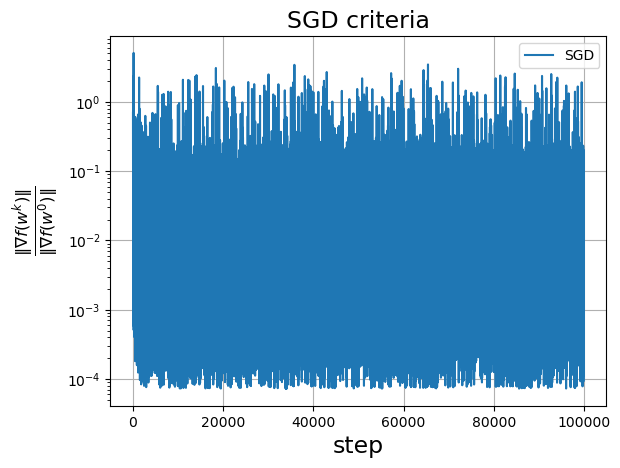

In [128]:
x_axis, y_axis = [], []
for history in [history]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['SGD']
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, 'SGD criteria', scale='log')

__в). (10 баллов)__ Варьируйте размер батча: $b = 1, 10, 100, 1000$, а шаг равным $\gamma_k \equiv \frac{1}{\tilde L}$ (обратите внимание, что $\tilde L$ нужно пересчитывать для каждого $b$). Постройте график сходимости: значение критерия сходимости от номера итерации для каждого $b$. Честное ли сравнение отражает этот график? Почему? Придумайте, как сравнить результаты между собой более честно (время работы - хороший вариант, но его использовать нельзя) и постройте новый график сравнения. Сделайте вывод.

In [158]:
#ваше решение (Code и Markdown)
history_batch_size = []
for batch_size in [1, 10, 100, 1000]:
    sgd = SGD(lamda)
    _, history = sgd.fit(X_train, y_train, batch_size=batch_size, gamma=1/L, X_test=X_test, y_test=y_test)
    history_batch_size.append(history)

100%|██████████████████████████████████| 100000/100000 [07:06<00:00, 234.29it/s]


In [183]:
for history in history_batch_size:
    print(history[-1])

[7.335381630394051, 0.12535650399645107, 379.6926951408386, 0.9772272657331897, 0.9716923076923077]
[0.0011958092070679758, 0.11374856795822522, 359.7986981868744, 0.9864594553008155, 0.9864615384615385]
[0.0015583395967723446, 0.11281765585952924, 368.07809376716614, 0.9870749346053239, 0.9876923076923076]
[0.0004648375125738591, 0.11269131105361394, 426.815153837204, 0.987228804431451, 0.9889230769230769]


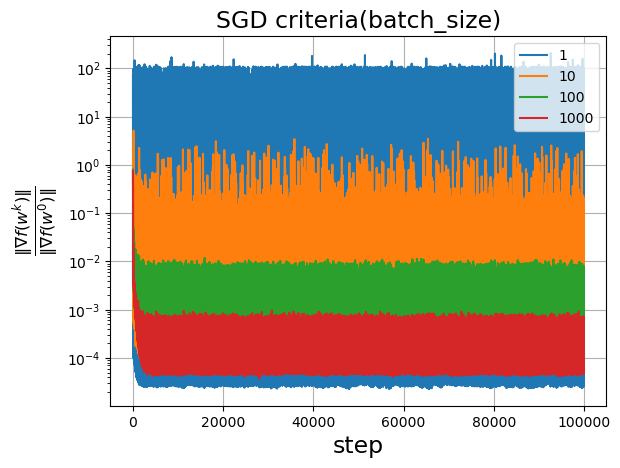

In [164]:
x_axis, y_axis = [], []
for history in history_batch_size:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['1', '10', '100', '1000']
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, 'SGD criteria(batch_size)', scale='log')

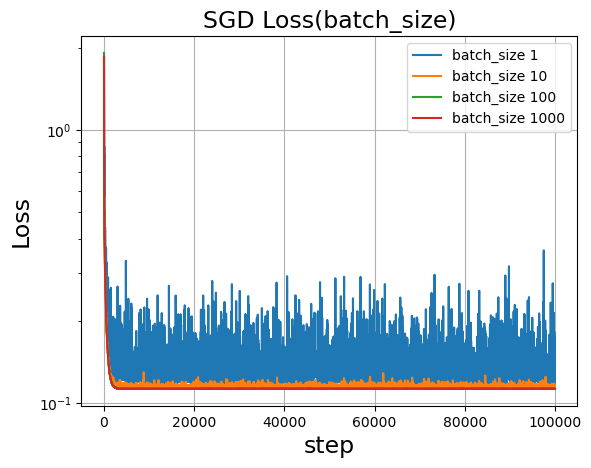

In [169]:
x_axis, y_axis = [], []
for history in history_batch_size:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['batch_size 1', 'batch_size 10', 'batch_size 100', 'batch_size 1000']
plot(x_axis, y_axis, 'step', "Loss", labels, 'SGD Loss(batch_size)', scale='log')

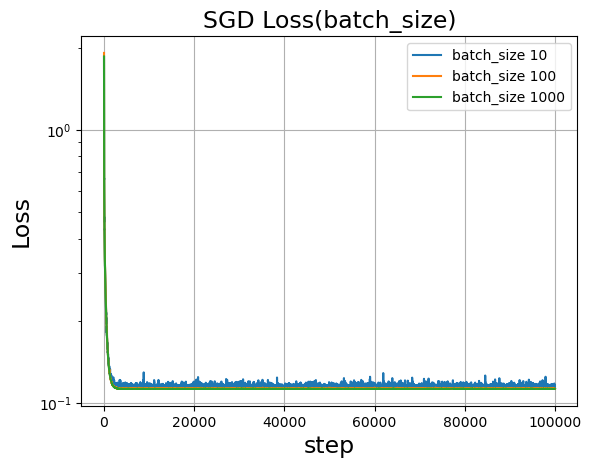

In [168]:
x_axis, y_axis = [], []
for history in history_batch_size[1:]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['batch_size 10', 'batch_size 100', 'batch_size 1000']
plot(x_axis, y_axis, 'step', "Loss", labels, 'SGD Loss(batch_size)', scale='log')

__г). (10 баллов)__ Зафиксируем $b = 10$. Теперь попробуем менять стратегию выбора шага:

1) $\gamma_k \equiv \frac{1}{\tilde L}$, как делали ранее,

2) $\gamma_k \equiv \text{const}$, подбирая $\text{const}$ так, чтобы добиться "наилучшей" сходимости (объясните, что понимаете под "наилучшей"),

3) $\gamma_k = \frac{1}{\sqrt{k + 1}}$, 

4) $\gamma_k = \frac{1}{k + 1}$.

Постройте график сходимости: значение критерия сходимости от номера итерации. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

In [173]:
history_gamma = []
for gamma in [1/L, 0.01, 0.5, "sqrt", "k"]:
    sgd = SGD(lamda)
    _, history = sgd.fit(X_train, y_train, batch_size=10, gamma=gamma, X_test=X_test, y_test=y_test)
    history_gamma.append(history)

100%|██████████████████████████████████| 100000/100000 [04:36<00:00, 362.19it/s]


In [182]:
for history in history_gamma:
    print(history[-1])

[0.0011958092070679758, 0.11374856795822522, 291.43765020370483, 0.9864594553008155, 0.9864615384615385]
[0.0015219951518055438, 0.11269471103161881, 291.061163187027, 0.9870749346053239, 0.9889230769230769]
[0.0011208992930012848, 0.11517259938780539, 301.37960505485535, 0.9878442837359593, 0.9889230769230769]
[0.0007915905479397027, 0.11761227306904162, 275.44962787628174, 0.9883058932143407, 0.9889230769230769]
[0.017976986276387094, 0.5297403578081238, 276.09742999076843, 0.8858285890136944, 0.8750769230769231]


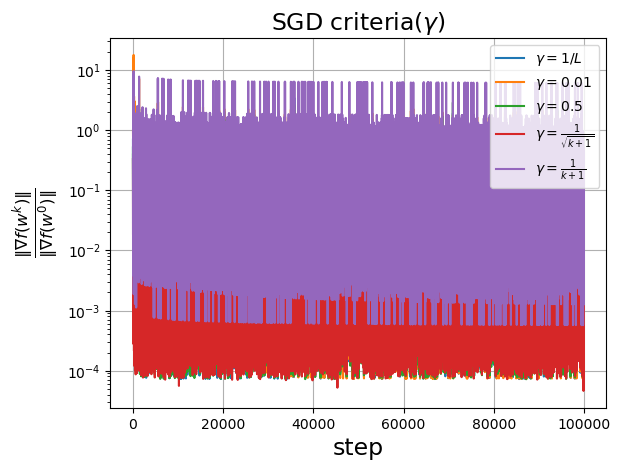

In [175]:
x_axis, y_axis = [], []
for history in history_gamma:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$", r"$\gamma = \frac{1}{\sqrt{k+1}}$", r"$\gamma = \frac{1}{k+1}$"]
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, r'SGD criteria($\gamma$)', scale='log')

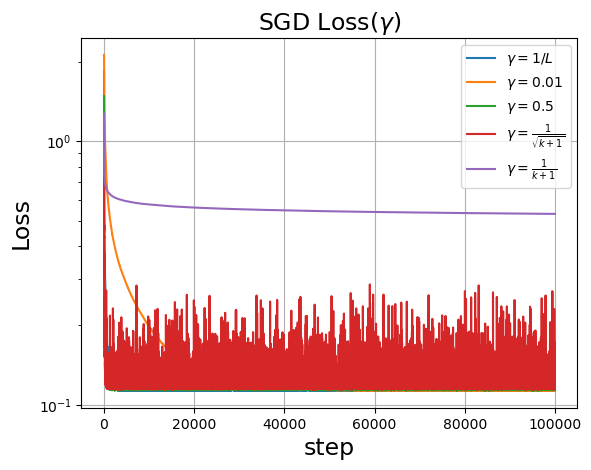

In [177]:
x_axis, y_axis = [], []
for history in history_gamma:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$", r"$\gamma = \frac{1}{\sqrt{k+1}}$", r"$\gamma = \frac{1}{k+1}$"]
plot(x_axis, y_axis, 'step', "Loss", labels, r'SGD Loss($\gamma$)', scale='log')

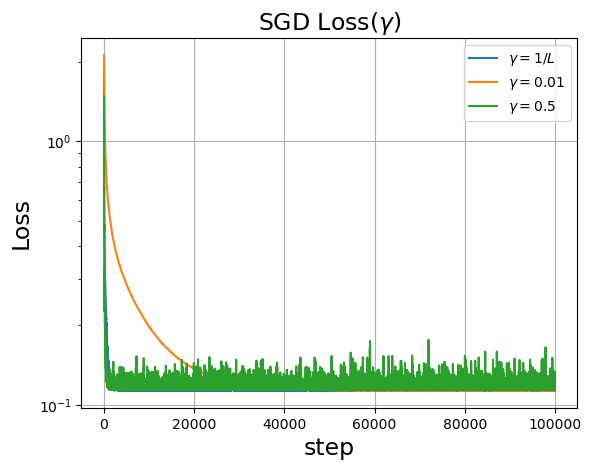

In [178]:
x_axis, y_axis = [], []
for history in history_gamma[:-2]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$"]
plot(x_axis, y_axis, 'step', "Loss", labels, r'SGD Loss($\gamma$)', scale='log')

__д). $\triangle$ (10 баллов)__ В прошлых заданиях мы, используя полученное решения задачи оптимизации, предсказывали ответы на тестовой выборке. Напомним суть: исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $g$ можно предсказывать значения меток $y$. Пусть у нас есть сэмпл $x_i$, ответ модели для этого сэмпла есть $g(w^*, x^i)$. Тогда предсказывающее правило можно сформулировать следующим довольно естественным образом:
$$
y_i = 
\begin{cases}
1, & g(w^*, x^i) \geq 0,
\\
-1, & g(w^*, x^i) < 0.
\end{cases}
$$
Cделав предсказания на тестовой выборке $X_{test}$, можно сравните результат с реальными метками $y_{test}$. Количество правильно угаданных меток есть точность/accuracy модели.

Посмотрите какую точность дает модель обученная с помощью SGD. Повторите пункт в)-г), только теперь постройте графики зависимости точности, а не критерия сходимости. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

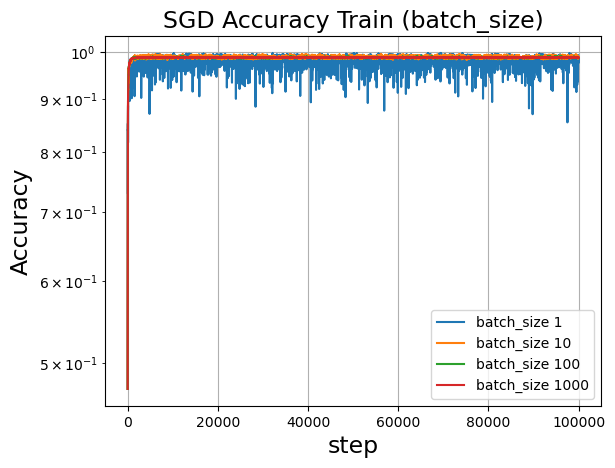

In [185]:
x_axis, y_axis = [], []
for history in history_batch_size:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-2] for x in history])
labels = ['batch_size 1', 'batch_size 10', 'batch_size 100', 'batch_size 1000']
plot(x_axis, y_axis, 'step', "Accuracy", labels, 'SGD Accuracy Train (batch_size)', scale='log')

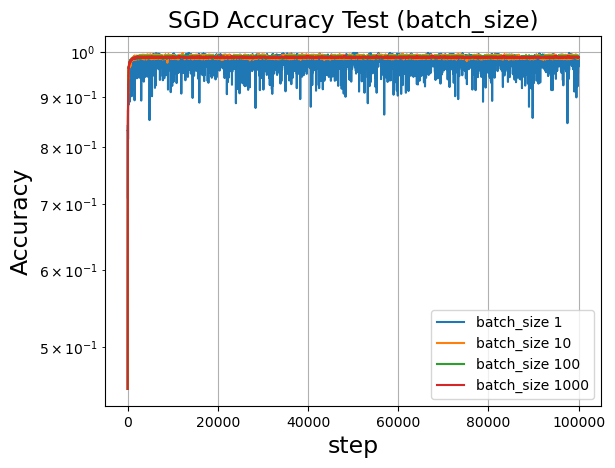

In [186]:
x_axis, y_axis = [], []
for history in history_batch_size:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-1] for x in history])
labels = ['batch_size 1', 'batch_size 10', 'batch_size 100', 'batch_size 1000']
plot(x_axis, y_axis, 'step', "Accuracy", labels, 'SGD Accuracy Test (batch_size)', scale='log')

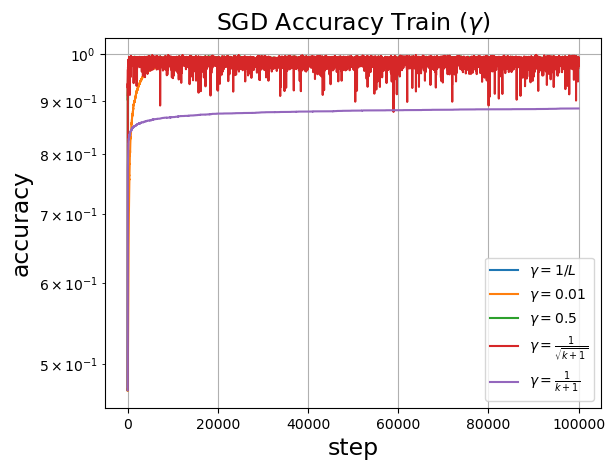

In [179]:
x_axis, y_axis = [], []
for history in history_gamma:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-2] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$", r"$\gamma = \frac{1}{\sqrt{k+1}}$", r"$\gamma = \frac{1}{k+1}$"]
plot(x_axis, y_axis, 'step', "accuracy", labels, r'SGD Accuracy Train ($\gamma$)', scale='log')

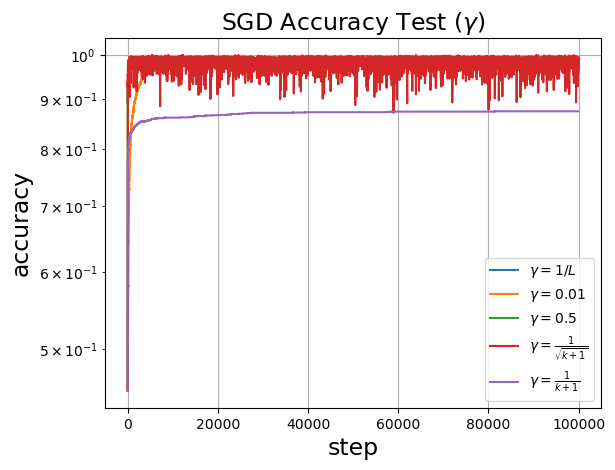

In [180]:
x_axis, y_axis = [], []
for history in history_gamma:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-1] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$", r"$\gamma = \frac{1}{\sqrt{k+1}}$", r"$\gamma = \frac{1}{k+1}$"]
plot(x_axis, y_axis, 'step', "accuracy", labels, r'SGD Accuracy Test ($\gamma$)', scale='log')

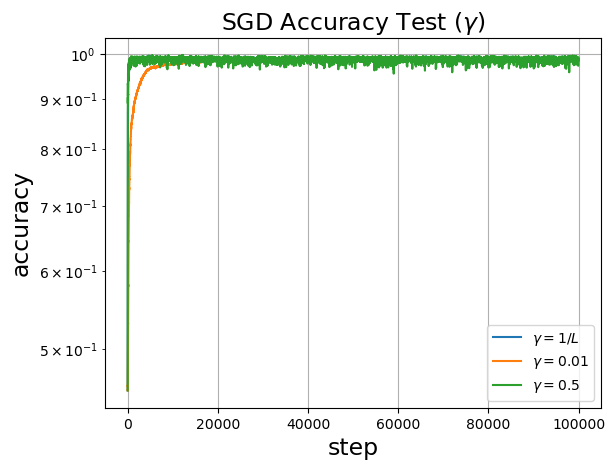

In [181]:
x_axis, y_axis = [], []
for history in history_gamma[:-2]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-1] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$"]
plot(x_axis, y_axis, 'step', "accuracy", labels, r'SGD Accuracy Test ($\gamma$)', scale='log')

__e). (15 баллов)__ Реализуйте метод SAGA (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)) для нашей задачи. Решите задачу оптимизации на обучающей выборке с помощью нового реализованного метода. Возьмите $b = 10$, а шаг согласно теории (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)). Постройте графики сравнения SGD (с шагом $\gamma_k \equiv \frac{1}{\tilde L}$) и SAGA: 1) значение критерия сходимости от номера итерации, 2) точность предсказаний от номера итерации. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

In [209]:
sgd = SGD(lamda)
_, history_sgd = sgd.fit(X_train, y_train, batch_size=10, gamma=1/L, X_test=X_test, y_test=y_test)

100%|██████████████████████████████████| 100000/100000 [05:00<00:00, 332.37it/s]


In [249]:
class SAGA(LogisticRegression):
    def fit(self, X_train, y_train, batch_size, gamma=1e-1, K=10**5, 
            eps=1e-8, mode = 'grad', X_test=None, y_test=None):
        history = []
        start = time.time()
        X_batches, y_batches = get_batches(X_train, y_train, batch_size)
        weigth_0 = self.weigth
        
        psi_grad = np.zeros((len(X_batches), X_train.shape[1]))
        
        for i in tqdm(range(K)):
            batch_idx = np.random.randint(len(X_batches))
            X_batch, y_batch = X_batches[batch_idx], y_batches[batch_idx]
            
            if gamma == "sqrt":
                gamma_k = 1 / (i+1)**0.5
            elif gamma == "k":
                gamma_k = 1 / (i+1)
            else:
                gamma_k = gamma
                
            psi_grad_new = self.get_grad(X_batch, y_batch, self.weigth)
            
            weigth_new = self.weigth - gamma_k*(psi_grad_new - psi_grad[batch_idx] + psi_grad.mean(axis=0))
            psi_grad[batch_idx] = psi_grad_new
            
            crit = calc_mode(weigth_0, weigth_new, self.get_grad, mode, X_batch, y_batch)
            history.append([crit, self.loss(weigth_new, X_train, y_train), time.time() - start, 
                            self.get_accuracy_score(X_train, y_train), self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [197]:
saga = SAGA(lamda)
_, history_saga = saga.fit(X_train, y_train, batch_size=10, gamma=1/(6*L), X_test=X_test, y_test=y_test)

100%|██████████████████████████████████| 100000/100000 [04:38<00:00, 358.90it/s]


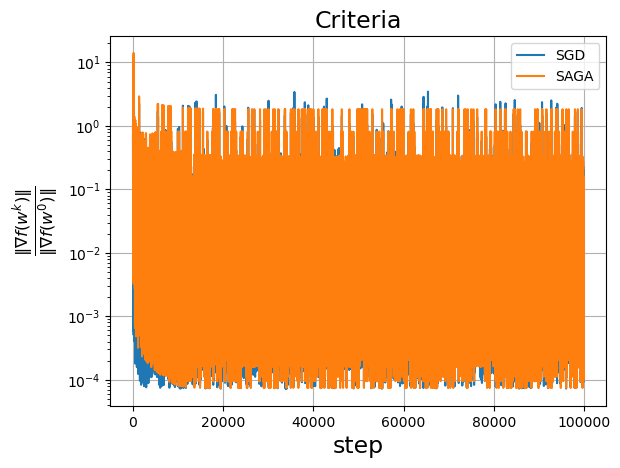

In [210]:
x_axis, y_axis = [], []
for history in [history_sgd, history_saga]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, 'Criteria', scale='log')

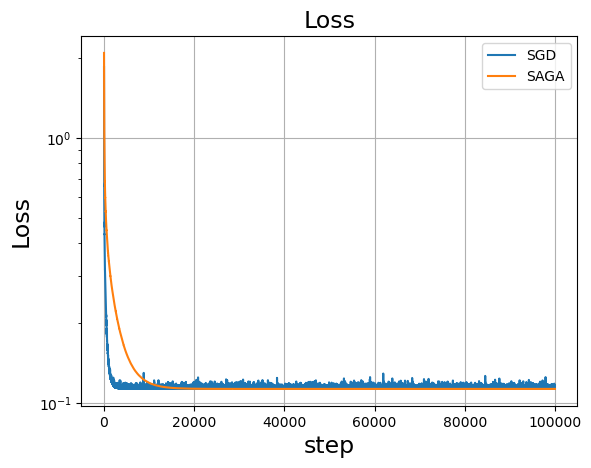

In [211]:
x_axis, y_axis = [], []
for history in [history_sgd, history_saga]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', 'Loss', labels, 'Loss', scale='log')

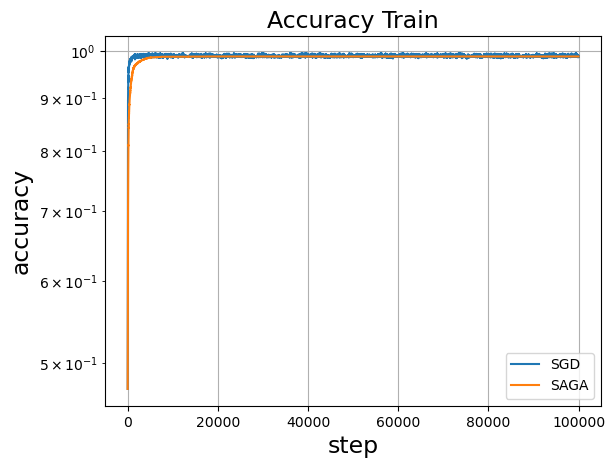

In [212]:
x_axis, y_axis = [], []
for history in [history_sgd, history_saga]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-2] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', "accuracy", labels, r'Accuracy Train', scale='log')

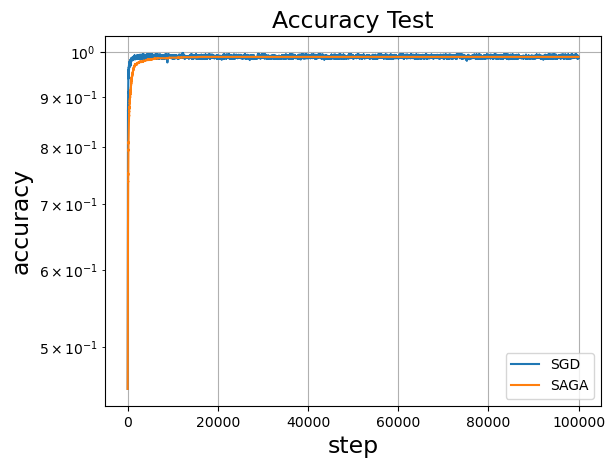

In [213]:
x_axis, y_axis = [], []
for history in [history_sgd, history_saga]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-1] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', "accuracy", labels, r'Accuracy Test', scale='log')

Как в пункте г.2), подберите "наилучший" шаг для SAGA. Постройте графики сравнения SGD и SAGA c "наилучшими" шагами: 1) значение критерия сходимости от номера итерации, 2) точность предсказаний от номера итерации. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

In [217]:
history_saga_gamma = []
for gamma in [1/L, 1/(6*L), 0.01, 0.5, "sqrt", "k"]:
    saga = SAGA(lamda)
    _, history = saga.fit(X_train, y_train, batch_size=10, gamma=gamma, X_test=X_test, y_test=y_test)
    history_saga_gamma.append(history)

100%|██████████████████████████████████| 100000/100000 [04:46<00:00, 349.07it/s]


In [218]:
for history in history_saga_gamma:
    print(history[-1])

[0.0016214236624399823, 0.11265395990059802, 1301.7043759822845, 0.987228804431451, 0.9889230769230769]
[0.0016214236720384118, 0.11265395990060684, 285.6685791015625, 0.987228804431451, 0.9889230769230769]
[0.001623361924480705, 0.11265748652893416, 287.2828929424286, 0.987228804431451, 0.9889230769230769]
[0.001621423662439977, 0.11265395990059804, 278.56469225883484, 0.987228804431451, 0.9889230769230769]
[0.0016214236624399767, 0.11265395990059804, 284.35095596313477, 0.987228804431451, 0.9889230769230769]
[0.01780870916757423, 0.5288146104888249, 286.4764358997345, 0.8856747191875673, 0.8750769230769231]


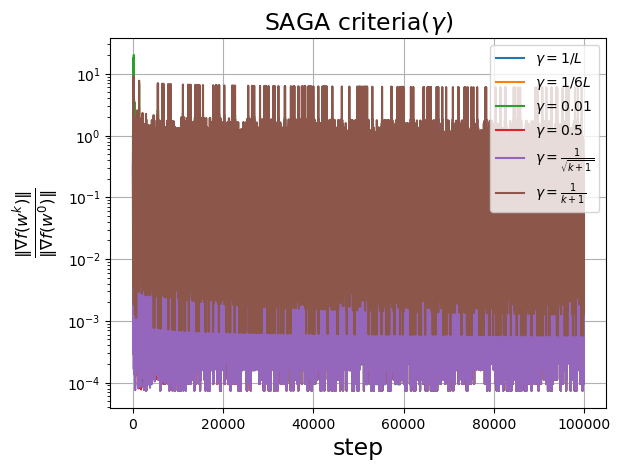

In [219]:
x_axis, y_axis = [], []
for history in history_saga_gamma:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 1/6L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$", r"$\gamma = \frac{1}{\sqrt{k+1}}$", r"$\gamma = \frac{1}{k+1}$"]
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, r'SAGA criteria($\gamma$)', scale='log')

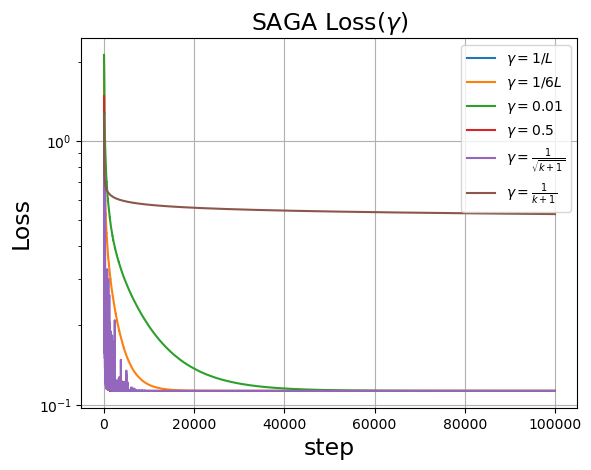

In [220]:
x_axis, y_axis = [], []
for history in history_saga_gamma:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = [r"$\gamma = 1/L$", r"$\gamma = 1/6L$", r"$\gamma = 0.01$", r"$\gamma = 0.5$", r"$\gamma = \frac{1}{\sqrt{k+1}}$", r"$\gamma = \frac{1}{k+1}$"]
plot(x_axis, y_axis, 'step', "Loss", labels, r'SAGA Loss($\gamma$)', scale='log')

__Best models__

In [221]:
sgd = SGD(lamda)
_, history_sgd_best = sgd.fit(X_train, y_train, batch_size=10, gamma=0.01, X_test=X_test, y_test=y_test)

100%|██████████████████████████████████| 100000/100000 [04:55<00:00, 338.62it/s]


In [222]:
saga = SAGA(lamda)
_, history_saga_best = saga.fit(X_train, y_train, batch_size=10, gamma=1/(6*L), X_test=X_test, y_test=y_test)

100%|██████████████████████████████████| 100000/100000 [04:27<00:00, 373.45it/s]


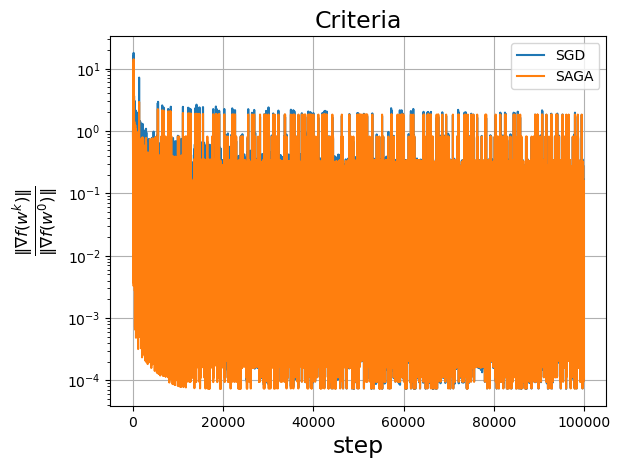

In [223]:
x_axis, y_axis = [], []
for history in [history_sgd_best, history_saga_best]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, 'Criteria', scale='log')

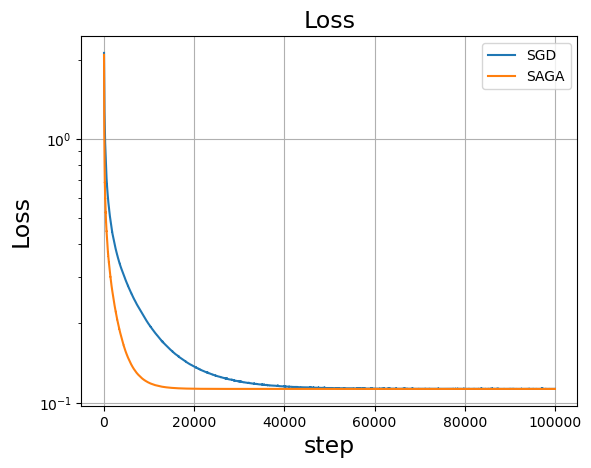

In [224]:
x_axis, y_axis = [], []
for history in [history_sgd_best, history_saga_best]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', 'Loss', labels, 'Loss', scale='log')

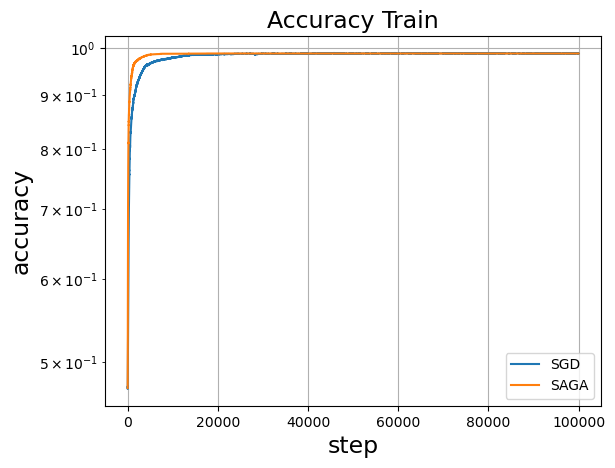

In [225]:
x_axis, y_axis = [], []
for history in [history_sgd_best, history_saga_best]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-2] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', "accuracy", labels, r'Accuracy Train', scale='log')

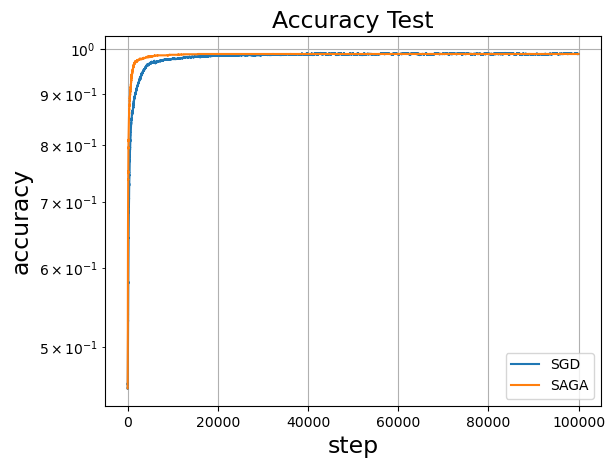

In [226]:
x_axis, y_axis = [], []
for history in [history_sgd_best, history_saga_best]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[-1] for x in history])
labels = ['SGD', 'SAGA']
plot(x_axis, y_axis, 'step', "accuracy", labels, r'Accuracy Test', scale='log')

### Часть 2. Адаптивная оптимизация

В этой части задания мы продолжаем работать с задачей минимизации эмпирического риска из Части 1. Мы будем обсуждать адаптивные методы. Вы можете использовать в них, как полные/детерминистические градиенты (рекомендуемо), так и стохастические версии из предыдущей части задания.

__Задача 1. $\triangle$ (всего 15 баллов)__ Когда речь заходит об адаптивных методах, в оптимизационном сообществе в первую очередь вспоминают не AdaGrad, Adam и другие подобные методы. Понятие адаптивности изначально было интересно с точки зрения выбора общего шага, а не для каждой отдельной координаты. Например, AdaGradNorm является одним из таких методов, но сейчас мы рассмотрим адаптивный выбор шага для гладких задач (напомним, что AdaGrad и AdaGradNorm были в первую очередь мотивированы теорией для негладких задач).

Рассмотрим стандартный детерминистический метод градиентного спуска:
$$
x^{k+1} = x^k - \gamma_k \nabla f(x^k)
$$
Раньше (в предыдущих домашних заданиях) мы использовали шаг типа $\gamma_k = \frac{1}{L}$. Но свойства гладкости задачи могут меняться от точки к точке, и нет необходимости оценивать $\gamma_k$ через худшую $L$.

Сделаем выбор константы $L$ адаптивным. Измерить локальную $L$ вдоль текущего направления метода можно с помощью:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может быть полезна следующая процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```
Найденную $L_k$ мы можем подставить в градиентный спуск:
$$
x^{k+1} = x^k - \frac{1}{L_k} \nabla f(x^k)
$$

__а). $\triangle$ (5 баллов)__ В процедуре выше, что нужно брать в качестве вектора __h__? Как стоит выбирать __rho__: оно должно быть больше или меньше 1? Как стоит инициализировать __L0__: большой или маленькой величиной?

In [1]:
#ваше решение (Markdown)

- Вектор $h$ следует выбирать, как градиент функции. Так как это равенство должно соблюдаться для всех $y$. А антиградиент указывает в сторону наискорейшего спуска, поэтому значение $f(y)$ скорее всего будет локальным минимум в окрестности точки $x^k$.
- Параметр $\rho$ следует брать меньше 1, чтобы уменьшить значение $L$ для более точной аппроксимации (например, $\rho = 0.5$ или $\rho = 0.9$).
- Начальное значение $L_0$ лучше выбирать достаточное большим, чтобы процедура backtracking могла скорректировать его в сторону уменьшения, если это необходимо.

__б). $\triangle$ (5 баллов)__ Реализуйте процедуру backtrackingа и добавьте ее в качестве способа подбора шага в градиентном спуске.

In [2]:
#ваше решение (Code)

In [232]:
def backtracking_L(X_train, y_train, f, grad, x, L0, rho):
    L = L0
    fx = f(x, X_train, y_train)
    h = grad
    while True:
        y = x - 1 / L * h
        if f(y, X_train, y_train) <= fx -1/L * grad.dot(h) + 1/(2*L) * h.dot(h):
            break
        else:
            L = L * rho
    return L

In [247]:
class GD(LogisticRegression):
    def fit(self, X_train, y_train, gamma=1e-1, K=10**5, 
            eps=1e-8, mode = 'grad', X_test=None, y_test=None):
        history = []
        start = time.time()
        weigth_0 = self.weigth
        
        for i in tqdm(range(K)):
            if gamma == "backtracking_L":
                grad = self.get_grad(X_train, y_train, self.weigth)
                gamma_k = backtracking_L(X_train, y_train, self.loss, grad, self.weigth, 20, 0.9)
            elif gamma == "sqrt":
                gamma = 1 / (i+1)**0.5
            elif gamma == "k":
                gamma_k = 1 / (i+1)
            else:
                gamma_k = gamma
            weigth_new = self.weigth - gamma_k*self.get_grad(X_train, y_train, self.weigth)
            
            crit = calc_mode(weigth_0, weigth_new, self.get_grad, mode, X_train, y_train)
            history.append([crit, self.loss(weigth_new, X_train, y_train), time.time() - start, 
                            self.get_accuracy_score(X_train, y_train), self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [285]:
# gd = GD(lamda)
# _, history_gd_back = gd.fit(X_train, y_train, gamma="backtracking_L", X_test=X_test, y_test=y_test)

__в). $\triangle$ (5 баллов)__ Сравните градиентный метод с процедурой backtrackingа и с постоянным шагом $\frac{1}{L}$. Постройте графики сравнения: 1) значение критерия сходимости в зависимости от количества итераций, 2) значение критерия сходимости в зависимости от времени. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

__Задача 2. (всего 45 баллов)__ Теперь перейдем к привычным для обывателя адаптивным методам

__а). (15 баллов)__ Реализуйте методы AdaGrad, RMSProp и Adam. Для удобства используйте следующую таблицу (здесь в качестве $g^k$ можно брать полный градиент в точке $x^k$, а можно стохастический).

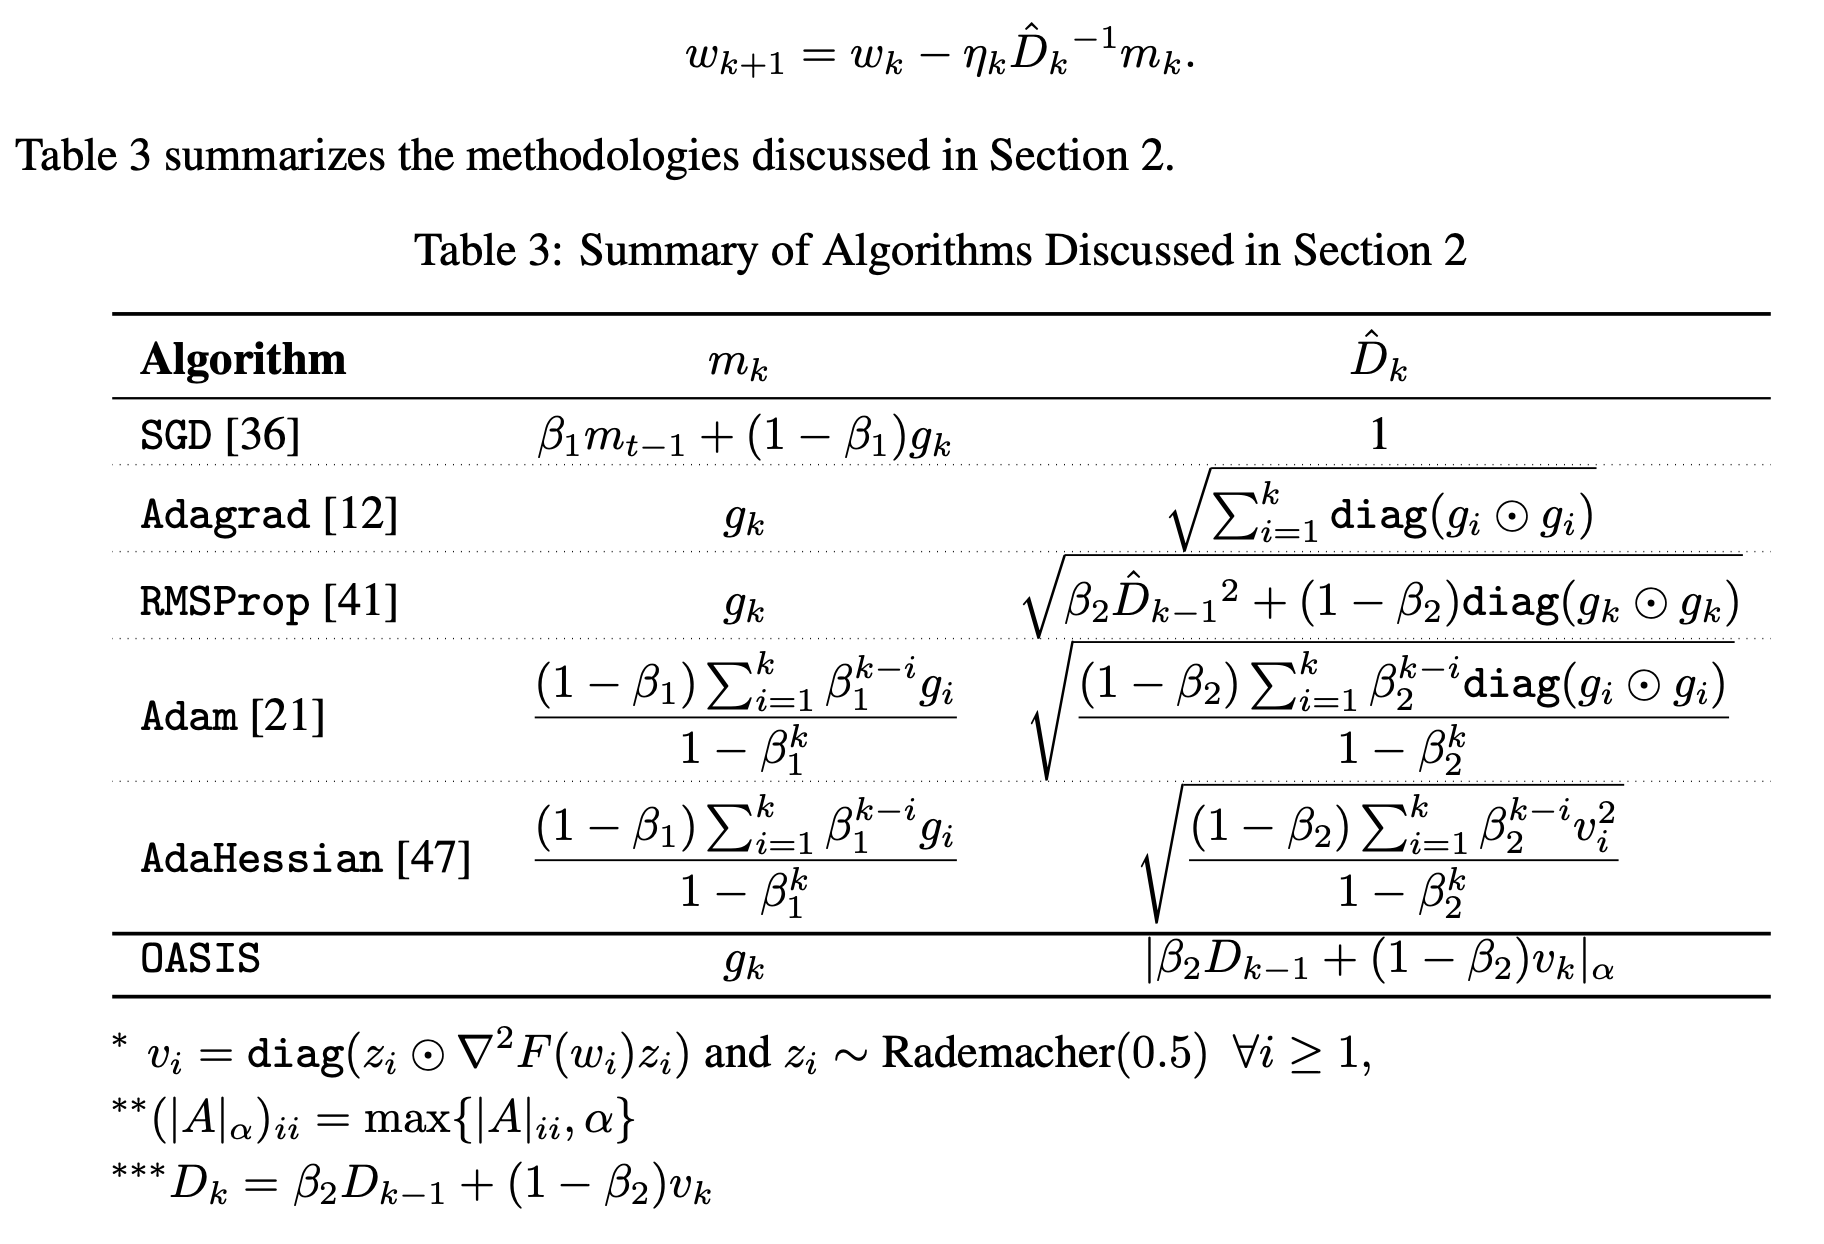

In [ ]:
#ваше решение (Code и Markdown)

In [254]:
class AdaGrad(LogisticRegression):
    def fit(self, X_train, y_train, lr=1e-1, K=10**5, 
            eps=1e-8, mode = 'grad', X_test=None, y_test=None):
        history = []
        start = time.time()
        weigth_0 = self.weigth
        grad_history = np.zeros(weigth_0.shape)
        
        for i in tqdm(range(K)):
            grad = self.get_grad(X_train, y_train, self.weigth)
            grad_history += grad**2
            weigth_new = self.weigth - lr*grad/(np.sqrt(grad_history) + eps)
            
            crit = calc_mode(weigth_0, weigth_new, self.get_grad, mode, X_train, y_train)
            history.append([crit, self.loss(weigth_new, X_train, y_train), time.time() - start, 
                            self.get_accuracy_score(X_train, y_train), self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [260]:
class RMSProp(LogisticRegression):
    def fit(self, X_train, y_train, lr=1e-1, beta2=0.9, K=10**5, 
            eps=1e-8, mode = 'grad', X_test=None, y_test=None):
        history = []
        start = time.time()
        weigth_0 = self.weigth
        grad_history = np.zeros(weigth_0.shape)
        
        for i in tqdm(range(K)):
            grad = self.get_grad(X_train, y_train, self.weigth)
            grad_history = beta2*grad_history + (1-beta2)*grad**2
            weigth_new = self.weigth - lr*grad/(np.sqrt(grad_history) + eps)
            
            crit = calc_mode(weigth_0, weigth_new, self.get_grad, mode, X_train, y_train)
            history.append([crit, self.loss(weigth_new, X_train, y_train), time.time() - start, 
                            self.get_accuracy_score(X_train, y_train), self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [279]:
class Adam(LogisticRegression):
    def fit(self, X_train, y_train, lr=1e-1, beta1=0.9, beta2=0.999, 
            K=10**5, eps=1e-8, mode = 'grad', X_test=None, y_test=None):
        history = []
        start = time.time()
        weigth_0 = self.weigth
        d_history = np.zeros(weigth_0.shape)
        m_history = np.zeros(weigth_0.shape)
        
        for i in tqdm(range(1, K)):
            grad = self.get_grad(X_train, y_train, self.weigth)
            
            d_history = beta2*d_history + (1-beta2)*grad**2
            D = d_history / (1 - beta2**i)
            m_history = beta1*m_history + (1-beta1)*grad
            m = m_history / (1 - beta1**i)
            
            weigth_new = self.weigth - lr*m/(np.sqrt(D) + eps)
            
            crit = calc_mode(weigth_0, weigth_new, self.get_grad, mode, X_train, y_train)
            history.append([crit, self.loss(weigth_new, X_train, y_train), time.time() - start, 
                            self.get_accuracy_score(X_train, y_train), self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

__б). (10 баллов)__ Зафиксируйте $\beta_1 = 0$ и $\beta_2 =0,95$ (для RMSProp и Adam). Попробуйте настроить шаг $\eta_k$ для каждого метода. Объясните, как вы определили, что стратегия шага является "лучшей" (здесь нет универсального рецепта, только ваши мысли).  Постройте график сравнения: значение критерия сходимости от количества итераций.

In [ ]:
#ваше решение (Code и Markdown)

Стратегия следующая: лучший шаг тот, который пришёл первым в голову

In [255]:
adagrad = AdaGrad(lamda)
_, history_adagrad = adagrad.fit(X_train, y_train, lr=1e-2, X_test=X_test, y_test=y_test)

100%|██████████████████████████████████| 100000/100000 [10:46<00:00, 154.66it/s]


In [272]:
rmsprop = RMSProp(lamda)
_, history_rmsprop = rmsprop.fit(X_train, y_train, lr=1e-2, beta2=0.95, X_test=X_test, y_test=y_test)

100%|██████████████████████████████████| 100000/100000 [14:45<00:00, 112.95it/s]


In [280]:
adam = Adam(lamda)
_, history_adam = adam.fit(X_train, y_train, lr=1e-2, beta1=0.0, beta2=0.95, X_test=X_test, y_test=y_test)

100%|█████████████████████████████████████| 99999/99999 [19:07<00:00, 87.12it/s]


In [281]:
history_adam[-1]

[0.000143857131159196,
 0.11289435867096181,
 1147.8027458190918,
 0.9864594553008155,
 0.9870769230769231]

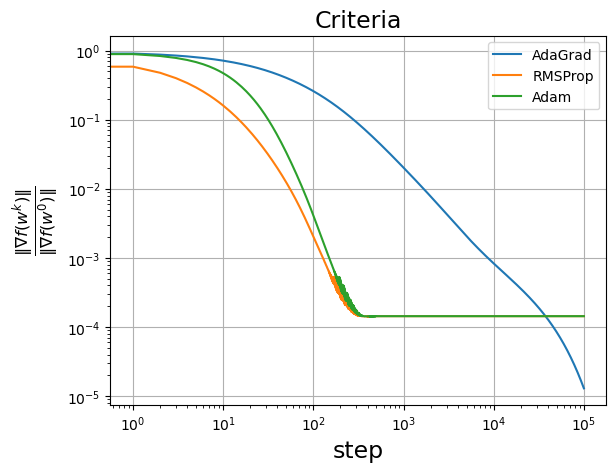

In [282]:
x_axis, y_axis = [], []
for history in [history_adagrad, history_rmsprop, history_adam]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['AdaGrad', 'RMSProp', 'Adam']
plot(x_axis, y_axis, 'step', r'$ \frac{\| \nabla f(w^k)\|}{\| \nabla f(w^0)\|}$', labels, 'Criteria', scale='log', xscale='log')

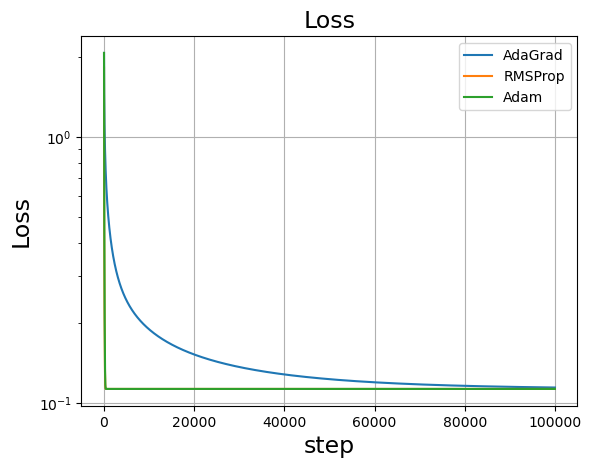

In [283]:
x_axis, y_axis = [], []
for history in [history_adagrad, history_rmsprop, history_adam]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['AdaGrad', 'RMSProp', 'Adam']
plot(x_axis, y_axis, 'step', 'Loss', labels, 'Loss', scale='log')

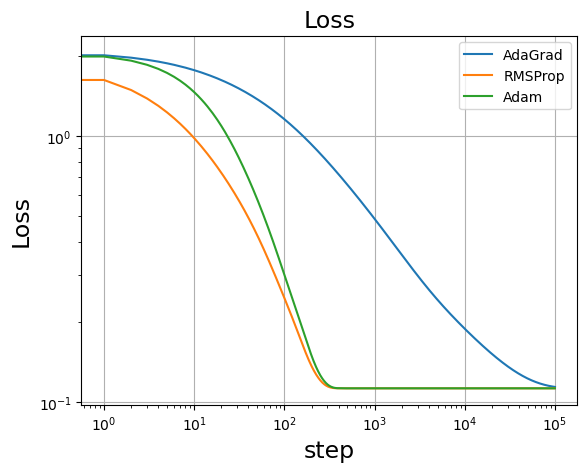

In [284]:
x_axis, y_axis = [], []
for history in [history_adagrad, history_rmsprop, history_adam]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['AdaGrad', 'RMSProp', 'Adam']
plot(x_axis, y_axis, 'step', 'Loss', labels, 'Loss', scale='log', xscale='log')

__в). (10 баллов)__ Зафиксируйте $\beta_1 = 0$ и шаг $\eta$ (какое-нибудь подходящее значение, основанное на результатах предыдущего пункте). Варьируйте параметр $\beta_2 =0.5, 0.9, 0.99, 0.999$ для RMSProp и Adam. Постройте графики сравнения для каждого метода: значение критерия сходимости от количества итераций. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

__г). $\triangle$ (10 баллов)__ Возьмем GD, AdaGrad, RMSProp, Adam. Все методы с $\beta_1 = 0$, подобранным шага, Adam и PRMProp с наилучшим $\beta_2$ из предыдущего пункта. Постройте графики сравнения: 1) значения критерия сходимости от количества итераций, 2) точности предсказания от количества итераций. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

### Часть 3. CVXPY

In [ ]:
import numpy as np

__Задача 1. (всего 15 баллов)__ Транспортное средство (например, самолет) движется по заданному маршруту, состоящему из $n$ участков, соединяющих $n+1$ путевую точку с индексами от $0$ до $n$. Участок $i$ начинается на путевой точке $i-1$ и заканчивается на путевой точке $i$. Транспортное средство стартует в момент времени $t=0$ с путевой точки $0$. Оно движется по каждому участку с постоянной (неотрицательной) скоростью: $s_i$ - скорость на участке $i$. Для скоростей на каждом участке заданы нижние и верхние границы: $s_i^\mathrm{min} \leq s_i \leq s_i^\mathrm{max}$. Транспортное средство не останавливается на путевых точках, оно сразу же продолжает движение к следующему участку. Длина участка $i$ равна $d_i > 0$, соотвественно время прохождения этого участка равно $d_i/s_i$. Пусть $\tau_i$, $i = 1, \ldots, n$, обозначает время прибытия транспортного средства на путевую точку $i$. Транспортное средство должно прибыть на путевую точку $i$  между заранее заданными моментами времени: $\tau_i^\mathrm{min} \leq \tau_i \leq \tau_i^\mathrm{max}$. Скорость расхода топлива (кг/c) зависит от скорости движения и выражается выпуклой возрастающей функцией 

$$\Phi(s_i) = a s_i^2 + b s_i + c,$$ 

где значения параметров равны $a = 1$, $b = 6$, $c = 10$.

Вам даны длины участков $\{d_i\}_{i=1}^n$, ограничения на скорость $\{s^\mathrm{min}_i\}_{i=1}^n$ и $\{s^\mathrm{max}_i\}_{i=1}^n$, ограничения на времена прохождения путевых точек $\{\tau^\mathrm{min}_i\}_{i=1}^n$ и $\{\tau^\mathrm{max}_i\}_{i=1}^n$. Задача - выбрать скорости $\{s_i\}_{i=1}^n$, чтобы минимизировать суммарный расход топлива.

In [ ]:
d = np.array([1.9501,1.2311,1.6068,1.486,1.8913,1.7621,1.4565,1.0185,1.8214,1.4447,1.6154,1.7919,1.9218,1.7382,1.1763,1.4057,1.9355,1.9169,1.4103,1.8936,1.0579,1.3529,1.8132,1.0099,1.1389,1.2028,1.1987,1.6038,1.2722,1.1988,1.0153,1.7468,1.4451,1.9318,1.466,1.4186,1.8462,1.5252,1.2026,1.6721,1.8381,1.0196,1.6813,1.3795,1.8318,1.5028,1.7095,1.4289,1.3046,1.1897,1.1934,1.6822,1.3028,1.5417,1.1509,1.6979,1.3784,1.86,1.8537,1.5936,1.4966,1.8998,1.8216,1.6449,1.818,1.6602,1.342,1.2897,1.3412,1.5341,1.7271,1.3093,1.8385,1.5681,1.3704,1.7027,1.5466,1.4449,1.6946,1.6213,1.7948,1.9568,1.5226,1.8801,1.173,1.9797,1.2714,1.2523,1.8757,1.7373,1.1365,1.0118,1.8939,1.1991,1.2987,1.6614,1.2844,1.4692,1.0648,1.9883])
smin = np.array([0.7828,0.6235,0.7155,0.534,0.6329,0.4259,0.7798,0.9604,0.7298,0.8405,0.4091,0.5798,0.9833,0.8808,0.6611,0.7678,0.9942,0.2592,0.8029,0.2503,0.6154,0.505,1.0744,0.215,0.968,1.1708,1.1901,0.9889,0.6387,0.6983,0.414,0.8435,0.52,1.1601,0.9266,0.612,0.9446,0.4679,0.6399,1.1334,0.8833,0.4126,1.0392,0.8288,0.3338,0.4071,0.8072,0.8299,0.5705,0.7751,0.6514,0.2439,0.2272,0.5127,0.2129,0.584,0.8831,0.2928,0.2353,0.8124,0.8085,0.2158,0.2164,0.3901,0.7869,0.2576,0.5676,0.8315,0.9176,0.8927,0.2841,0.6544,0.6418,0.5533,0.3536,0.8756,0.8992,0.9275,0.6784,0.7548,0.321,0.6508,0.9159,1.0928,0.4731,0.4548,1.0656,0.4324,1.0049,1.1084,0.4319,0.4393,0.2498,0.2784,0.8408,0.3909,1.0439,0.3739,0.3708,1.1943])
smax = np.array([1.9624,1.6036,1.6439,1.5641,1.7194,1.909,1.3193,1.3366,1.947,2.8803,2.5775,1.4087,1.6039,2.9266,1.4369,2.3595,3.228,1.889,2.8436,0.5701,1.1894,2.4425,2.2347,2.2957,2.7378,2.8455,2.1823,1.6209,1.2499,1.3805,1.5589,2.8554,1.8005,3.092,2.1482,1.8267,2.1459,1.5924,2.7431,1.4445,1.7781,0.8109,2.7256,2.429,2.5997,1.8125,1.9073,1.5275,2.1209,2.5419,1.7032,0.5636,1.3669,2.32,2.1006,2.7239,2.8726,1.3283,1.7769,2.575,1.4963,2.3254,1.6548,1.9537,1.5557,1.6551,2.7307,1.8018,2.5287,1.9765,1.8387,2.3525,1.7362,1.6805,1.964,2.8508,1.9424,2.078,2.1677,2.1863,2.0541,1.9734,2.7687,2.3715,1.1449,2.156,3.331,2.3456,2.712,2.3783,0.9611,2.069,1.2805,0.8585,2.2744,2.3369,2.6918,2.6728,2.5941,1.612])
tau_min = np.array([1.0809,2.7265,3.5118,5.3038,5.4516,7.1648,9.2674,12.1543,14.4058,16.6258,17.9214,19.8242,22.2333,22.4849,25.3213,28.0691,29.8751,30.6358,33.2561,34.7963,36.9943,38.261,41.1451,41.3613,43.0215,43.8974,46.4713,47.4786,49.5192,49.6795,50.7495,52.2444,53.5477,55.2351,57.085,57.425,60.1198,62.3834,64.7568,67.2016,69.2116,69.8143,70.6335,72.5122,74.1228,74.3013,74.5682,75.3821,76.6093,78.0315,80.7584,82.5472,83.534,84.9686,86.7601,87.2445,89.7329,92.6013,94.3879,94.4742,96.9105,98.7409,100.8453,101.1219,102.3966,103.5233,104.0218,106.5212,109.0372,110.392,113.2618,113.7033,116.3131,118.6214,119.9539,121.8157,124.6708,126.5908,127.3328,128.3909,128.9545,130.4264,131.6542,133.0448,134.8776,135.0912,136.034,137.8591,138.3842,140.2473,140.9852,142.7472,144.2654,145.6597,147.284,150.111,151.1363,152.3417,153.2647,154.4994])
tau_max = np.array([4.6528,6.5147,7.5178,9.7478,9.0641,10.3891,13.154,16.0878,17.4352,20.9539,22.3695,23.3875,25.7569,26.9019,29.889,33.0415,33.8218,35.4414,37.1583,39.4054,41.652,41.5935,44.9329,45.4028,47.4577,48.0358,50.3929,51.3692,52.6947,53.5665,54.4821,55.8495,58.2514,59.7541,61.9845,61.5409,63.1482,66.5758,69.3892,72.1558,72.6555,74.2216,74.6777,77.378,78.5495,77.7574,78.4675,78.7265,81.547,81.7429,83.8565,87.0579,88.3237,88.5409,90.2625,92.11,92.9949,97.4829,98.7916,99.1695,100.3291,102.651,104.0075,105.8242,106.5207,107.1619,107.7716,111.2568,112.7815,113.5394,116.6615,116.8022,120.4465,121.8652,123.9981,125.0498,129.2106,130.3409,131.9796,131.4842,133.1503,135.3247,135.2318,137.8225,138.0808,138.2218,139.5026,142.7253,141.5105,143.7757,145.9842,146.1712,148.2622,149.2407,151.6295,155.027,155.6694,156.6739,156.5266,157.6903])

__а). (5 баллов)__ Сформулируйте задачу в виде задачи выпуклой оптимизации. Если вы вводите новые переменные или делаете замены переменных, объясните, как восстановить оптимальные скорости из решения вашей задачи. Если выпуклость целевой функции или любой функции ограничения в вашей формулировке неочевидна, объясните, почему она выпуклая.

In [ ]:
#ваше решение (Markdown)

__б). (10 баллов)__ Решите задачу с помощью `cvxpy`. Выведите значение оптимального расхода топлива. Постройте график оптимальной скорости от индекса участка.

In [ ]:
#ваше решение (Code и Markdown)

__Задача 2. (всего 35 баллов)__ Задача о многопродуктовом потоке возникает, когда потоки между разными парами источников-стоков делят пропускные способности дуг общей сети, как, например, в случае интернет-траффика,  автомобильного траффика, перемещения грузов.

Пусть дан двунаправленный граф с множеством вершин $\mathcal{V}$ ($\mathcal{V} = \{1, \ldots, n \}$) и множеством дуг (направленных ребер) $\mathcal{E}$ ($\mathcal{E} = \{1, \ldots, m \}$). Например, вершины могут обозначать города, а между которыми нужно перемещать грузы, а дуги - наличие односторонней дороги между городами. Для каждой дуги $e \in \mathcal{E}$ определены стоимость (cost) $c_e$ прохождения единицы потока по этой дуге и максимальный допустимый поток $b_e$ (capacity) по этой дуге. В случае городов и дорог, $c_e$ - это затраты на перемещенения единицы груза по дороге, а $b_e$ - пропускная способность дорогие. Пусть для каждой пары вершин $(i,j) \in \mathcal{V}\times\mathcal{V}$ задан поток $d_{ij}$ из $i$ в $j$ (traffic matrix). $d_{ij}$ обозначает количество грузов необходимых переместить из города $i$ в город $j$. 

Тогда задачу о многопродуктовом потоке минимальной стоимости (минимальной по стоимости транспортировке грузов) можно сформулировать так:
\begin{align}
&\min_{f^{ij}_e \in \mathbb{R}} \left[\sum_{\in \mathcal{E}} c_e \sum_{i,j \in \mathcal{V}} f^{ij}_e\right]
\\ \text{s.t. }&  f_e^{ij} \geq 0, \qquad \forall e \in \mathcal{E}, ~\forall i,j \in \mathcal{V}
\\ & \sum_{i, j \in \mathcal{V}}f^{ij}_e \leq b_e \qquad \forall e\in\mathcal{E}
\\ & \sum_{e \in \mathcal{E}} A_{ve} f^{ij}_e = \begin{cases}-d_{ij}, & v = i \\ d_{ij}, & v = j \\ 0, & иначе \end{cases} \qquad \forall v \in \mathcal{V},
\end{align}
где $A$ - матрица инцидентности графа (вершины - дуги). 

In [ ]:
incidence_matrix = np.array([[-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,-1,-1,-1,-1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0,0,-1,-1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,1,0,0,0,0,0,0,0,-1,-1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,-1,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,0,1,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,-1,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,-1]])
traffic_matrix = np.array([[0.,0.3,0.7,0.1,0.4,0.2,0.1,0.2,0.3,0.1,0.1,1.3],[0.5,0.,1.4,0.8,13.2,2.1,0.6,16.2,2.1,0.5,0.6,8.7],[0.7,8.6,0.,7.4,77.6,3.4,7.9,90.8,5.6,0.8,1.2,5.2],[0.4,0.8,3.3,0.,1.8,1.8,1.,1.8,1.5,5.2,1.5,2.4],[0.2,6.1,3.,0.3,0.,0.8,0.5,3.9,1.6,0.1,0.4,3.6],[0.5,1.9,6.4,2.5,3.5,0.,1.1,5.3,4.4,0.5,0.8,3.1],[0.2,0.5,1.8,0.9,0.7,0.9,0.,0.7,0.9,0.3,0.5,1.1],[0.3,10.5,100.,1.5,38.,2.8,0.7,0.,2.8,5.4,2.3,16.8],[0.3,4.2,28.8,2.7,7.8,2.1,1.6,8.,0.,1.2,2.,11.3],[0.2,0.2,1.6,1.2,0.7,0.8,0.5,2.3,1.3,0.,1.4,0.9],[0.2,9.7,5.7,1.8,1.8,7.,3.2,8.6,3.,6.2,0.,3.8],[0.5,6.,8.1,3.8,6.3,2.4,2.4,10.4,9.4,1.5,1.9,0.]])
capacities = 200 * np.array([1,1,1,0.25,1,1,1,1,1,1,1,1,1,0.25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
nodes, edges = incidence_matrix.shape
costs = np.ones(edges)

__а). (5 баллов)__ Объясните, какой физический смысл имеют переменные $f_{e}^{ij}$, и докажите, что формулировка задачи корректна. 

In [ ]:
#ваше решение (Markdown)

__б). (10 баллов)__ С помощью `cvxpy` решите задачу в постановке выше. Постройте график оптимального суммарного потока по дуге от индекса дуги. Выведите оптимальную суммарную стоимость потока.

In [ ]:
#ваше решение (Code и Markdown)

__в). $\triangle$ (10 баллов)__ Будем считать, что в качестве решения нас интересуют только суммарный поток на каждой дуге. Переформулируйте задачу, уменьшив число переменных. Решите задачу в новой постановке с помощью `cvxpy`. Постройте график оптимального суммарного потока по дуге от индекса дуги, выведите оптимальную суммарную стоимость потока.

In [ ]:
#ваше решение (Code и Markdown)

__г). $\triangle$ (10 баллов)__ Теперь вы можете улучшить сеть, увеличив пропускные способности дуг на произвольную величину $d > 0$, но суммарно не больше чем на $b_{add}$: $\sum_{e \in \mathcal{E}} d_e \leq b_{add}$. Также хочется учесть, что может произойти ЧС на одной из дуг: на любой (но только одной) дуге может произойти авария, что выразится в уменьшении её пропускной способности в два раза. 

Как адаптировать задачу под такую постановку? Найдите такой вектор $d$, который минимизирует стоимость оптимального потока в худшем случае (то есть минимизует максимальную по всем возможным авариям стоимость оптимального потока). Постройте график $d$ от индекса дуги, выведите стоимость оптимального потока в худшем случае.

In [ ]:
#ваше решение (Code и Markdown)